In [1]:
import pandas as pd
df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")

C:\Users\shyam\AppData\Local\Temp\ipykernel_11056\3483609155.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")


In [2]:
# Removing unknown records from Driver at Fault
df = df[df["Driver At Fault"]!="Unknown"]

In [3]:
#converting everything into lower case 
df=df.applymap(lambda x: str(x).lower() if isinstance(x,str) else x)

C:\Users\shyam\AppData\Local\Temp\ipykernel_11056\4120849912.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x: str(x).lower() if isinstance(x,str) else x)


In [4]:
# converting to datetime object from string
import datetime
df["Crash Date/Time"] = df["Crash Date/Time"].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p"))

In [5]:
df = df.sort_values(by='Crash Date/Time')

In [6]:
# remove null values from this column 156 na found
df = df[df["Vehicle First Impact Location"].notna()]

# combining categories
df["Vehicle First Impact Location"] = df["Vehicle First Impact Location"].str.replace("roof top", "top", regex=True)
df["Vehicle First Impact Location"] = df["Vehicle First Impact Location"].str.replace(" ", "", regex=True)

df["Vehicle Movement"] = df["Vehicle Movement"].str.replace("making u-turn", "making u turn", regex=True)
df["Vehicle Movement"] = df["Vehicle Movement"].str.replace("parking", "parked", regex=True)

df["Driver Distracted By"] = df["Driver Distracted By"].str.replace("other distraction", "other action (looking away from task, etc.)", regex=True)
df["Driver Distracted By"] = df["Driver Distracted By"].str.replace("other cellular phone related", "talking or listening to cellular phone", regex=True)
df["Driver Distracted By"] = df["Driver Distracted By"].str.replace("adjusting audio and or climate controls", "using other device controls integral to vehicle", regex=True)

df["Route Type"] = df["Route Type"].str.replace('-', 'unknown', regex=True)
df["Off-Road Description"] = df["Off-Road Description"].str.replace('-', 'unknown', regex=True)

df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("not suspect of alcohol use, not suspect of drug use", "none detected", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("unknown, unknown", "unknown", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("not suspect of alcohol use, suspect of drug use", "suspect of drug use", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("not suspect of alcohol use, unknown", "unknown", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("suspect of alcohol use, not suspect of drug use", "suspect of alcohol use", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("alcohol contributed", "alcohol present", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("illegal drug contributed", "illegal drug present", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("combination contributed", "combined substance present", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("suspect of alcohol use, unknown", "suspect of alcohol use", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("suspect of alcohol use, suspect of drug use", "combined substance present", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("not suspect of alcohol use, unknown", "unknown", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("unknown, suspect of drug use", "suspect of drug use", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("other", "unknown", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("unknown, not suspect of drug use", "none detected", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("medication contributed", "medication present", regex=True)


In [8]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

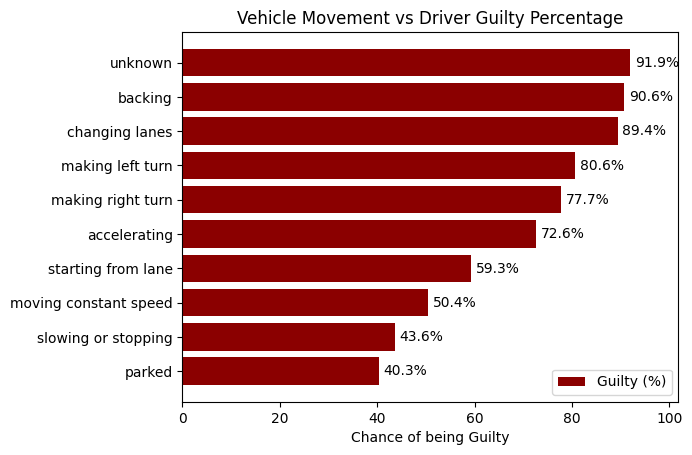

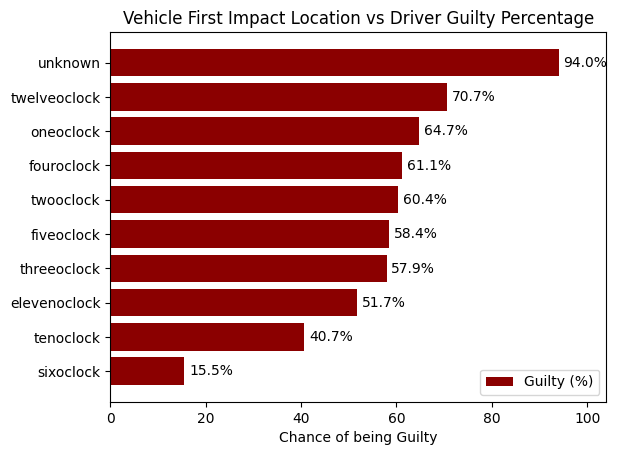

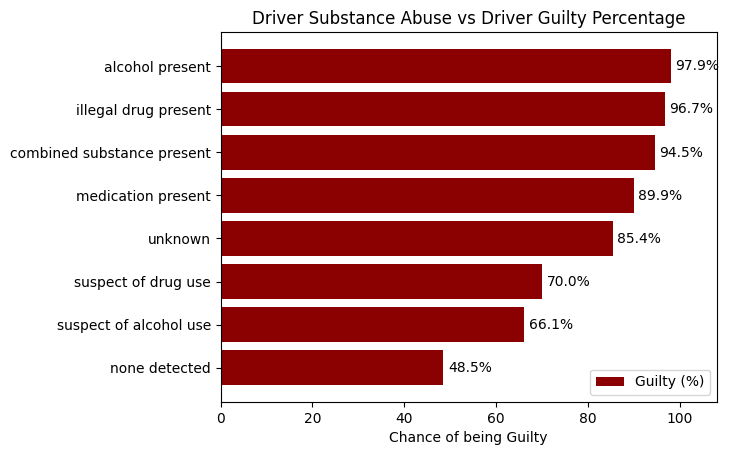

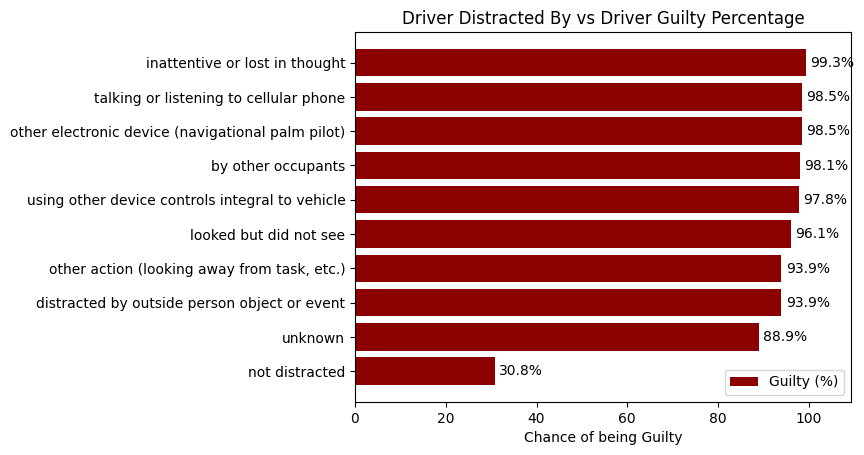

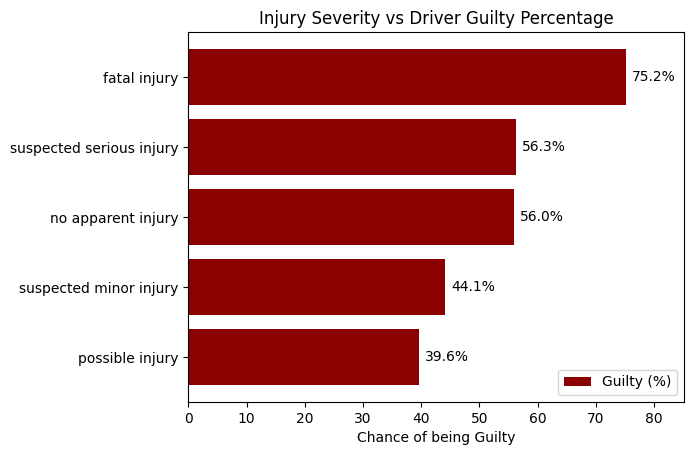

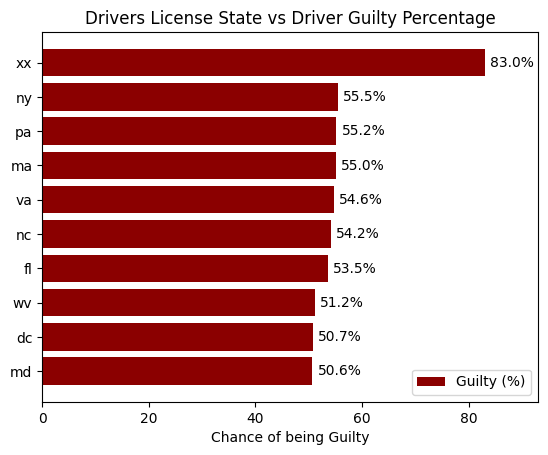

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to generate and plot crosstabs for a given column
def plot_driver_fault_crosstab(df, column, target_col="Driver At Fault", top_n=10):
    # Generate the crosstab
    crosstab = pd.crosstab(df[column], df[target_col])
    
    # Calculate the percentage of "yes" for each category
    crosstab["Yes_Percentage"] = (crosstab["yes"] / (crosstab["yes"] + crosstab["no"])) * 100
    
    # Sort by the number of "yes" in descending order
    crosstab_sorted = crosstab.sort_values(by="yes", ascending=False)
    
    # Select the top N categories
    top_categories = crosstab_sorted.head(top_n)
    
    # Sort the top categories by 'Yes_Percentage' in ascending order for a clean plot
    top_categories = top_categories.sort_values(by="Yes_Percentage", ascending=True)
    
    # Prepare data for plotting
    categories = list(top_categories.index)
    yes_ratios = top_categories["Yes_Percentage"]  # Percentages for 'yes'
    
    # Convert categories to positions
    x_indices = np.arange(len(categories))
    
    # Plot
    plt.barh(x_indices, yes_ratios, color='darkred', label='Guilty (%)')
    
    # Adjust x-axis limits to accommodate annotations
    plt.xlim(0, max(yes_ratios) + 10)  # Add padding to the right
    
    # Annotate each bar with its percentage
    for i, v in enumerate(yes_ratios):
        plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=10, color='black')  # Add text slightly to the right of the bar
    
    # Labels and Title
    plt.yticks(x_indices, categories)
    plt.xlabel('Chance of being Guilty')
    plt.title(f'{column} vs Driver Guilty Percentage')
    
    plt.legend()
    plt.show()

# Example usage
columns_of_interest = ["Vehicle Movement", "Vehicle First Impact Location", "Driver Substance Abuse", "Driver Distracted By", "Injury Severity", "Drivers License State"]  # Add your columns here

# Apply the function to each column
for col in columns_of_interest:
    plot_driver_fault_crosstab(df, col)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'rockville'),
  Text(1, 0, 'gaithersburg'),
  Text(2, 0, 'takoma park'),
  Text(3, 0, 'kensington'),
  Text(4, 0, 'chevy chase #4'),
  Text(5, 0, 'chevy chase #3'),
  Text(6, 0, 'friendship heights'),
  Text(7, 0, 'poolesville'),
  Text(8, 0, 'chevy chase view'),
  Text(9, 0, 'chevy chase village')])

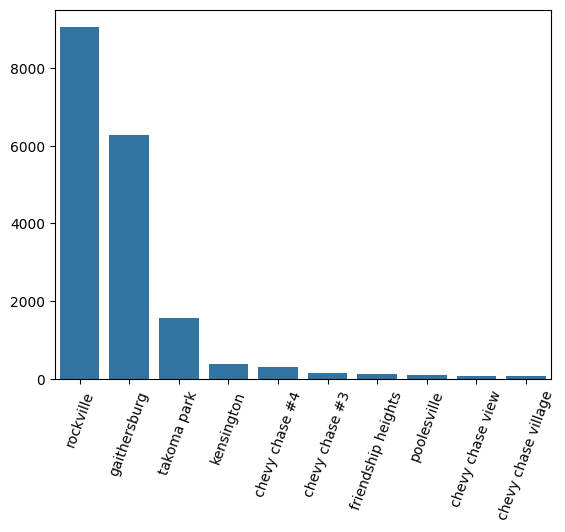

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = list(df["Municipality"].value_counts().index)[0:10], y = list(df["Municipality"].value_counts())[0:10])
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'pedestrian'),
  Text(1, 0, 'bicyclist'),
  Text(2, 0, 'other'),
  Text(3, 0, 'cyclist (non-electric)'),
  Text(4, 0, 'other conveyance'),
  Text(5, 0, 'machine operator/rider'),
  Text(6, 0, 'scooter (electric)'),
  Text(7, 0, 'other pedalcyclist'),
  Text(8, 0, 'cyclist (electric)')])

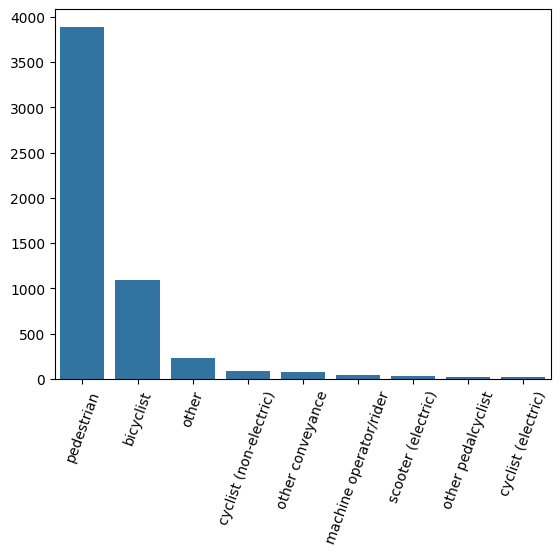

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = list(df["Related Non-Motorist"].value_counts().index)[0:9], y = list(df["Related Non-Motorist"].value_counts())[0:9])
plt.xticks(rotation=70)

<Axes: >

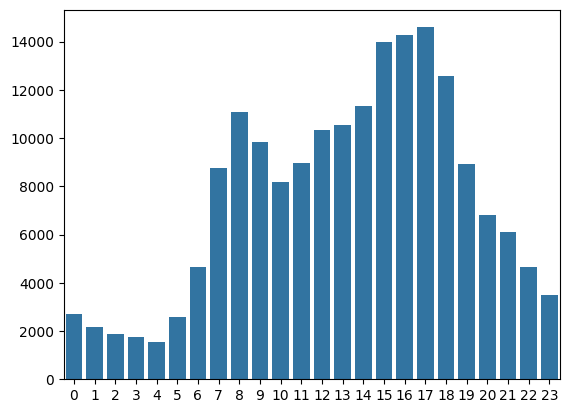

In [16]:
df["Hours"] = df["Crash Date/Time"].dt.hour
sns.barplot(x = list(df["Hours"].value_counts().index), y = list(df["Hours"].value_counts()))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'montgomery county police'),
  Text(1, 0, 'montgomery'),
  Text(2, 0, 'rockville police departme'),
  Text(3, 0, 'gaithersburg police depar'),
  Text(4, 0, 'takoma park police depart'),
  Text(5, 0, 'rockville'),
  Text(6, 0, 'gaithersburg'),
  Text(7, 0, 'maryland-national capital'),
  Text(8, 0, 'takoma'),
  Text(9, 0, 'mcpark')])

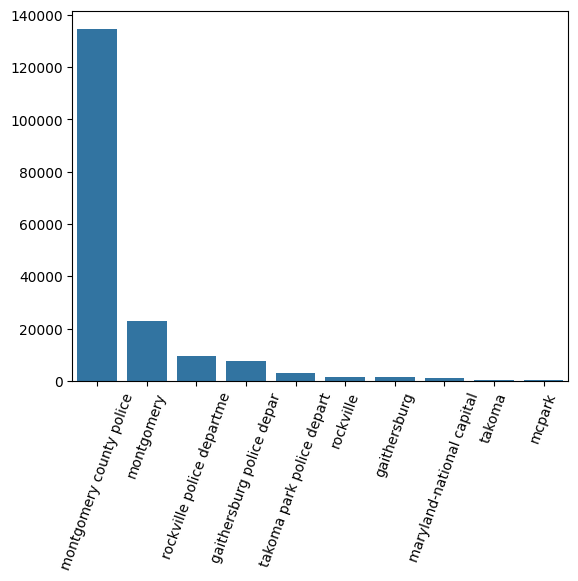

In [17]:
sns.barplot(x = list(df["Agency Name"].value_counts().index), y = list(df["Agency Name"].value_counts()))
plt.xticks(rotation=70)

In [19]:
df["Location"].value_counts().head(30)

Location
(38.953, -77.338)              45
(39.11342767, -77.23648183)    29
(39.045425, -76.99073667)      25
(39.04627667, -76.990695)      23
(39.07997592, -77.13826298)    20
(39.11061, -76.98979833)       19
(39.05350158, -77.08949028)    18
(39.109775, -76.91044)         18
(39.07676629, -77.11714305)    15
(39.72, -79.486)               14
(39.08277, -76.94851333)       14
(38.96338833, -77.08674)       12
(39.092455, -77.04575667)      12
(39.04696082, -77.0523119)     11
(39.06853929, -77.06174229)    11
(39.06579, -77.15987333)       10
(39.13007667, -77.48852)       10
(39.20274771, -77.24552401)    10
(39.072211, -77.13295)         10
(39.0737933, -77.1647059)      10
(39.0510455, -77.1151835)      10
(39.11943158, -77.16584444)     9
(39.12412391, -77.17994169)     9
(39.06099965, -77.09118779)     9
(38.983415, -77.09292167)       9
(39.01567007, -77.04209593)     9
(39.16944675, -77.19071671)     9
(39.1005488, -76.9350497)       9
(39.10066667, -76.98297)        9
(39.0

In [21]:
df["Vehicle Body Type"].value_counts()

Vehicle Body Type
passenger car                                                125186
(sport) utility vehicle                                       15640
pickup truck                                                   6570
van                                                            4823
transit bus                                                    3459
school bus                                                     2887
sport utility vehicle                                          2340
police vehicle/non emergency                                   2079
other light trucks (10,000lbs (4,536kg) or less)               1834
cargo van/light truck 2 axles (over 10,000lbs (4,536 kg))      1785
other                                                          1620
police vehicle/emergency                                       1474
medium/heavy trucks 3 axles (over 10,000lbs (4,536kg))         1399
unknown                                                        1079
motorcycle                    

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Filter data for Maryland and others
maryland_drivers = df[df['Drivers License State'] == 'md']
non_maryland_drivers = df[df['Drivers License State'] != 'md']

# Create a contingency table
contingency_table = pd.crosstab(
    df['Driver At Fault'], 
    df['Drivers License State'] == 'md'
)

# Perform a chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square test statistic:", chi2)
print("p-value:", p)

# Interpret the result
if p < 0.05:
    print("Fail to reject the null hypothesis: No evidence that Maryland drivers are more reckless.")
else:
    print("eject the null hypothesis: Maryland drivers are more reckless.")

Chi-square test statistic: 2484.0732752160943
p-value: 0.0
Reject the null hypothesis: Maryland drivers are more reckless.


In [23]:
df['Drivers License State'].value_counts()

Drivers License State
md        150391
dc          5353
va          5239
xx          1787
pa          1156
           ...  
fm             1
mp             1
mx-roo         1
mx-mex         1
mx-bcn         1
Name: count, Length: 77, dtype: int64